In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

/Users/sunchao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.chdir("/Users/sunchao/Desktop/Guo/")

# read train and test data

In [4]:
train_data = pd.read_csv("./regression/X_train.csv", header=0)
feature_columns = ["MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX"]
# remove id columns
train_data_part = train_data.iloc[:,1:]
# remove null columns
train_data_part.drop(['Unnamed: 7'],axis=1, inplace=True)

# train model

In [6]:
# split the train data of train-data and validation-data
X_train,X_val,y_train,y_val = train_test_split(train_data_part[feature_columns],train_data_part.PRP,train_size=0.9)

print("自变量---源数据:",train_data_part[feature_columns].shape, "；  训练集:",X_train.shape, "；  验证集:",X_val.shape)
print("因变量---源数据:",train_data_part.PRP.shape, "；  训练集:",y_train.shape, "；  验证集:",y_val.shape)


自变量---源数据: (168, 6) ；  训练集: (151, 6) ；  验证集: (17, 6)
因变量---源数据: (168,) ；  训练集: (151,) ；  验证集: (17,)


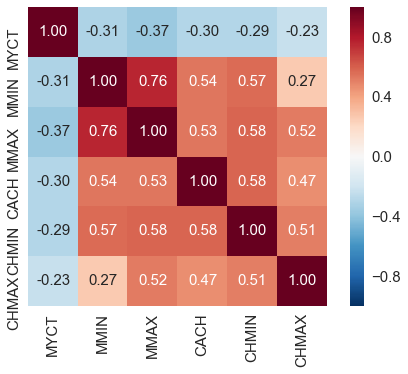

In [20]:
#获取相关系数矩阵
cm = np.corrcoef(train_data[feature_columns].values.T)
#设置字的比例
sns.set(font_scale=1.5)
#绘制相关系数图
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",
                 annot_kws={"size":15},yticklabels=feature_columns,xticklabels=feature_columns)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor1 = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor1.fit(X_train, y_train)  
y_pred = regressor1.predict(X_val) 

print("n_estimators=20的时候模型的评估结果")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))  


n_estimators=20的时候模型的评估结果
Mean Absolute Error: 17.133382352941176
Mean Squared Error: 814.8530621323526
Root Mean Squared Error: 28.54563122672807


In [40]:
regressor2 = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor2.fit(X_train, y_train)  
y_pred = regressor2.predict(X_val) 
print("n_estimators=200的时候模型的评估结果")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))  


n_estimators=200的时候模型的评估结果
Mean Absolute Error: 17.109641456582633
Mean Squared Error: 746.9120453821861
Root Mean Squared Error: 27.32969164447682


In [42]:
regressor3 = RandomForestRegressor(n_estimators=250, random_state=0)  
regressor3.fit(X_train, y_train)  
y_pred = regressor3.predict(X_val) 
print("n_estimators=250的时候模型的评估结果")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))  


n_estimators=250的时候模型的评估结果
Mean Absolute Error: 16.987873949579832
Mean Squared Error: 734.2781662881099
Root Mean Squared Error: 27.097567534524384


# 在n_estimators参数为250的时候 误差最小
# 通过plt对验证的结果进行展示

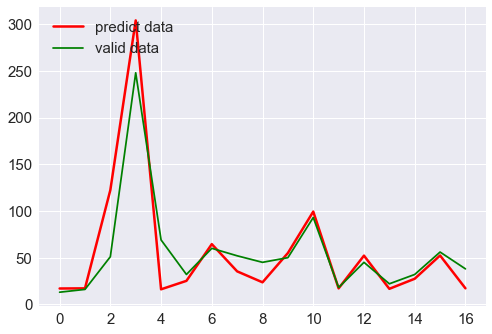

In [43]:
plt.plot(range(len(y_pred)),y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(y_val)),y_val,'green',label="valid data")
plt.legend(loc=2)
plt.show()#显示预测值与测试值曲线

# use model to predict the regression value of test data

In [46]:
test_data = pd.read_csv("./regression/X_test.csv")[feature_columns]
y_test = regressor3.predict(test_data)
y_test = [int(item) for item in y_test]
test_data['PRP'] = y_test
upload_data = test_data[['PRP']]
upload_data.to_csv("./regression/y-test-random-forest-regression.csv")